## 注意力机制
灵⻓类动物的视觉系统接受了⼤量的感官输⼊，这些感官输⼊远远超过了⼤脑能够完全处理的程度。然⽽，
并⾮所有刺激的影响都是相等的。意识的聚集和专注使灵⻓类动物能够在复杂的视觉环境中将注意⼒引向感
兴趣的物体，例如猎物和天敌。只关注⼀⼩部分信息的能⼒对进化更加有意义，使⼈类得以⽣存和成功。

⾃19世纪以来，科学家们⼀直致⼒于研究认知神经科学领域的注意⼒。本章的很多章节将涉及到⼀些研究。
⾸先回顾⼀个经典注意⼒框架，解释如何在视觉场景中展开注意⼒。受此框架中的注意⼒提⽰（attention cues）
的启发，我们将设计能够利⽤这些注意⼒提⽰的模型。1964年的Nadaraya-Waston核回归（kernel regression）
正是具有 注意⼒机制（attention mechanism）的机器学习的简单演⽰。

然后继续介绍的是注意⼒函数，它们在深度学习的注意⼒模型设计中被⼴泛使⽤。具体来说，我们将展⽰如何
使⽤这些函数来设计Bahdanau注意⼒。Bahdanau注意⼒是深度学习中的具有突破性价值的注意⼒模型，它
双向对⻬并且可以微分。

最后将描述仅仅基于注意⼒机制的Transformer架构，该架构中使⽤了多头注意⼒（multi-head attention）和
⾃注意⼒（self-attention）。⾃2017年横空出世，Transformer⼀直都普遍存在于现代的深度学习应⽤中，例
如语⾔、视觉、语⾳和强化学习领域。

## 注意力提示
⾃经济学研究稀缺资源分配以来，⼈们正处在“注意⼒经济”时代，即⼈类的注意⼒被视为可以交换的、有
限的、有价值的且稀缺的商品。许多商业模式也被开发出来去利⽤这⼀点：在⾳乐或视频流媒体服务上，⼈
们要么消耗注意⼒在⼴告上，要么付钱来隐藏⼴告；为了在⽹络游戏世界的成⻓，⼈们要么消耗注意⼒在游
戏战⽃中，从⽽帮助吸引新的玩家，要么付钱⽴即变得强⼤。总之，注意⼒不是免费的。

注意⼒是稀缺的，⽽环境中的⼲扰注意⼒的信息却并不少。⽐如⼈类的视觉神经系统⼤约每秒收到108位的
信息，这远远超过了⼤脑能够完全处理的⽔平。幸运的是，⼈类的祖先已经从经验（也称为数据）中认识到
“并⾮感官的所有输⼊都是⼀样的”。在整个⼈类历史中，这种只将注意⼒引向感兴趣的⼀⼩部分信息的能⼒，
使⼈类的⼤脑能够更明智地分配资源来⽣存、成⻓和社交，例如发现天敌、找寻⻝物和伴侣。


### 生物学中的注意力提示
注意⼒是如何应⽤于视觉世界中的呢？这要从当今⼗分普及的双组件（two-component）的框架开始讲起：
这个框架的出现可以追溯到19世纪90年代的威廉·詹姆斯，他被认为是“美国⼼理学之⽗”(James, 2007)。在
这个框架中，受试者基于⾮⾃主性提⽰和⾃主性提⽰有选择地引导注意⼒的焦点。

⾮⾃主性提⽰是基于环境中物体的突出性和易⻅性。想象⼀下，假如我们⾯前有五个物品：⼀份报纸、⼀篇
研究论⽂、⼀杯咖啡、⼀本笔记本和⼀本书，就像 图10.1.1。所有纸制品都是⿊⽩印刷的，但咖啡杯是红⾊
的。换句话说，这个咖啡杯在这种视觉环境中是突出和显眼的，不由⾃主地引起⼈们的注意。所以我们会把
视⼒最敏锐的地⽅放到咖啡上，如 图10.1.1所⽰。

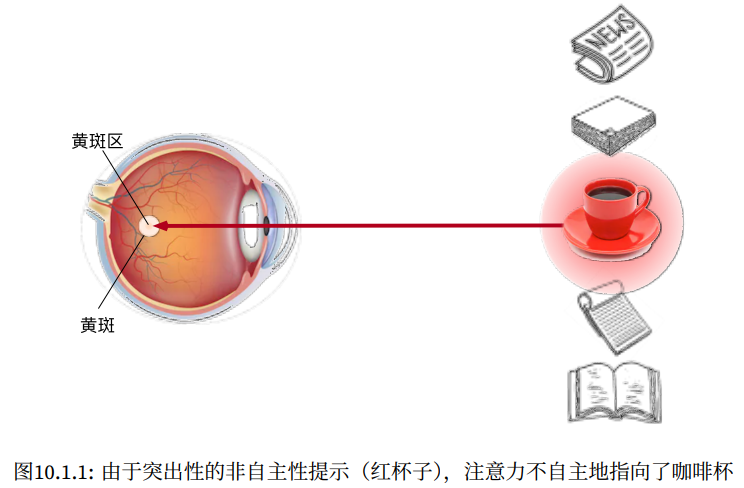

喝咖啡后，我们会变得兴奋并想读书，所以转过头，重新聚焦眼睛，然后看看书，就像 图10.1.2中描述那样。
与 图10.1.1中由于突出性导致的选择不同，此时选择书是受到了认知和意识的控制，因此注意⼒在基于⾃主
性提⽰去辅助选择时将更为谨慎。受试者的主观意愿推动，选择的⼒量也就更强⼤。

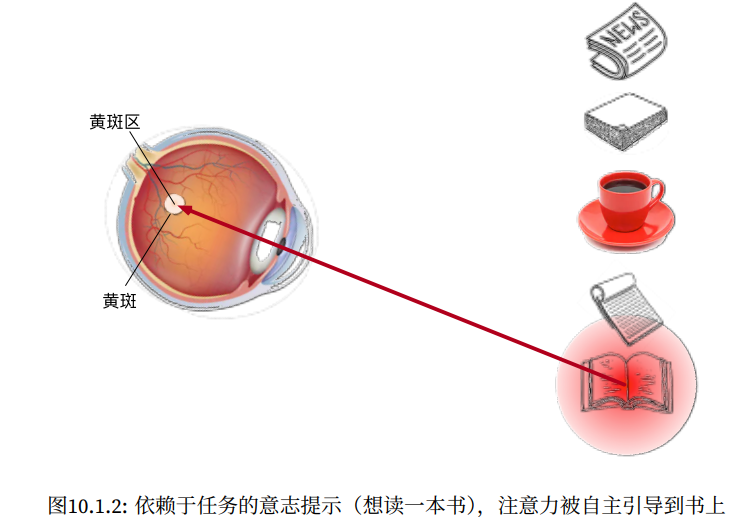  



### 查询、键和值
⾃主性的与⾮⾃主性的注意⼒提⽰解释了⼈类的注意⼒的⽅式，下⾯来看看如何通过这两种注意⼒提⽰，⽤
神经⽹络来设计注意⼒机制的框架，

⾸先，考虑⼀个相对简单的状况，即只使⽤⾮⾃主性提⽰。要想将选择偏向于感官输⼊，则可以简单地使⽤
参数化的全连接层，甚⾄是⾮参数化的最⼤汇聚层或平均汇聚层。

因此，“是否包含⾃主性提⽰”将注意⼒机制与全连接层或汇聚层区别开来。在注意⼒机制的背景下，⾃主性
提⽰被称为查询（query）。给定任何查询，注意⼒机制通过注意⼒汇聚（attention pooling）将选择引导⾄
感官输⼊（sensory inputs，例如中间特征表⽰）。在注意⼒机制中，这些感官输⼊被称为值（value）。更通
俗的解释，每个值都与⼀个键（key）配对，这可以想象为感官输⼊的⾮⾃主提⽰。如 图10.1.3所⽰，可以通
过设计注意⼒汇聚的⽅式，便于给定的查询（⾃主性提⽰）与键（⾮⾃主性提⽰）进⾏匹配，这将引导得出
最匹配的值（感官输⼊）。

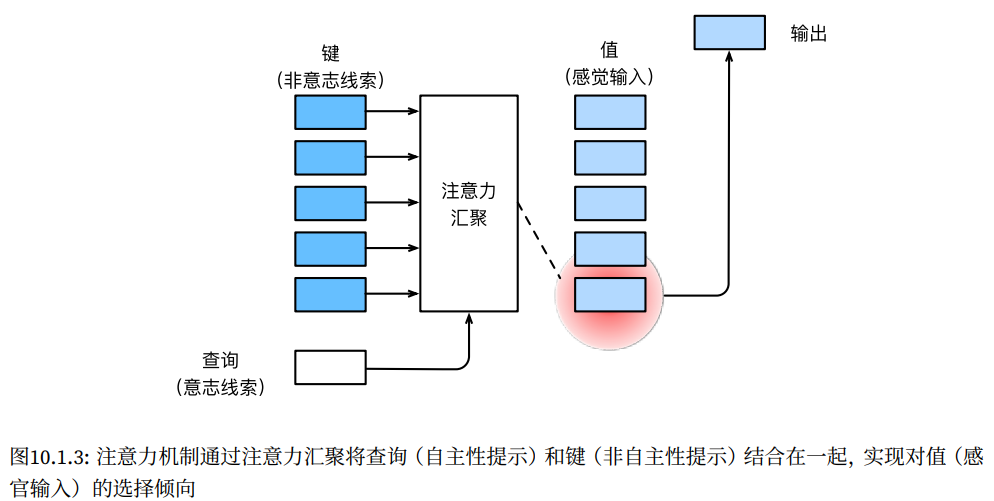

鉴于上⾯所提框架在 图10.1.3中的主导地位，因此这个框架下的模型将成为本章的中⼼。然⽽，注意⼒机制
的设计有许多替代⽅案。例如可以设计⼀个不可微的注意⼒模型，该模型可以使⽤强化学习⽅法 (Mnih et al.,
2014)进⾏训练。

### 注意力的可视化
平均汇聚层可以被视为输⼊的加权平均值，其中各输⼊的权重是⼀样的。实际上，注意⼒汇聚得到的是加权
平均的总和值，其中权重是在给定的查询和不同的键之间计算得出的。

In [2]:
import torch
from d2l import torch as d2l


为了可视化注意⼒权重，需要定义⼀个show_heatmaps函数。其输⼊matrices的形状是（要显⽰的⾏数，要显
⽰的列数，查询的数⽬，键的数⽬）。

In [3]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    """显⽰矩阵热图"""
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

下⾯使⽤⼀个简单的例⼦进⾏演⽰。在本例⼦中，仅当查询和键相同时，注意⼒权重为1，否则为0。


tensor([[[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]]])


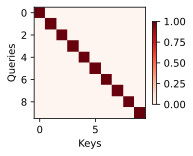

In [4]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
print(attention_weights)
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

后⾯的章节内容将经常调⽤show_heatmaps函数来显⽰注意⼒权重。

## 小结
* ⼈类的注意⼒是有限的、有价值和稀缺的资源。
* 受试者使⽤⾮⾃主性和⾃主性提⽰有选择性地引导注意⼒。前者基于突出性，后者则依赖于意识。
* 注意⼒机制与全连接层或者汇聚层的区别源于增加的⾃主提⽰。
* 由于包含了⾃主性提⽰，注意⼒机制与全连接的层或汇聚层不同。
* 注意⼒机制通过注意⼒汇聚使选择偏向于值（感官输⼊），其中包含查询（⾃主性提⽰）和键（⾮⾃主性提⽰）。键和值是成对的。
* 可视化查询和键之间的注意⼒权重是可⾏的。
